SPOTIFY ANALYSIS


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
spotify = pd.read_csv("F:\Analysis project\Spotify proj\Spotify_Song_Attributes.csv")
spotify.head()

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,"""Honest""",Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,...,0.2570,0.577,162.139,audio_features,7dTxqsaFGHOXwtzHINjfHv,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,...,0.1010,0.122,112.241,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827.0,4.0
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,0.3660,0.509,132.012,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,0.1190,0.896,120.969,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,0.0625,0.507,124.945,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0


In [2]:
spotify = spotify.drop_duplicates()
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5040 entries, 0 to 5039
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trackName         5040 non-null   object 
 1   artistName        5040 non-null   object 
 2   msPlayed          5040 non-null   int64  
 3   genre             4290 non-null   object 
 4   danceability      4765 non-null   float64
 5   energy            4765 non-null   float64
 6   key               4765 non-null   float64
 7   loudness          4765 non-null   float64
 8   mode              4765 non-null   float64
 9   speechiness       4765 non-null   float64
 10  acousticness      4765 non-null   float64
 11  instrumentalness  4765 non-null   float64
 12  liveness          4765 non-null   float64
 13  valence           4765 non-null   float64
 14  tempo             4765 non-null   float64
 15  type              4765 non-null   object 
 16  id                4765 non-null   object 
 17  

In [3]:
spotify.shape

(5040, 22)

In [4]:
spotify.isnull().sum()

trackName             0
artistName            0
msPlayed              0
genre               750
danceability        275
energy              275
key                 275
loudness            275
mode                275
speechiness         275
acousticness        275
instrumentalness    275
liveness            275
valence             275
tempo               275
type                275
id                  275
uri                 275
track_href          275
analysis_url        275
duration_ms         275
time_signature      275
dtype: int64

In [5]:
nan_count = spotify['genre'].isna().sum()
spotify['genre'].fillna('unknownn')
value_count = spotify ['genre'].value_counts()
value_count

genre
alt z                         328
pop                           301
filmi                         206
dance pop                      86
singer-songwriter pop          82
                             ... 
children's folk                 1
detroit indie                   1
celtic rock                     1
electro                         1
australian alternative pop      1
Name: count, Length: 523, dtype: int64

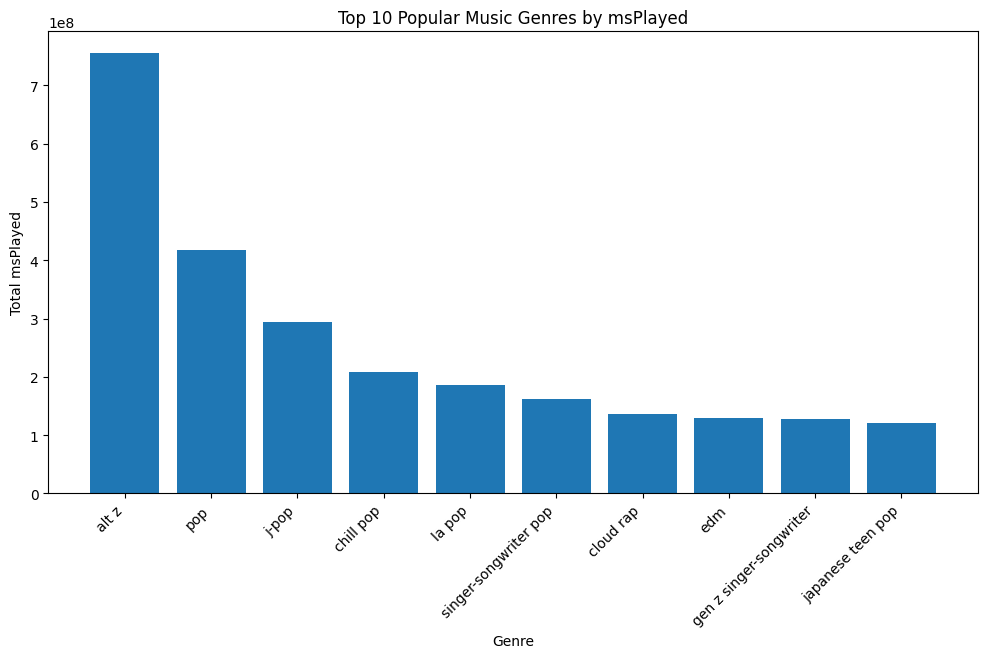

In [6]:
genre_popular = spotify.groupby('genre')['msPlayed'].sum()
genre_popular = pd.DataFrame({'genre' : genre_popular.index , 'Total' : genre_popular.values})
genre_popular = genre_popular.sort_values(by= 'Total' ,ascending= False)
genre_popular = genre_popular.head(10)
plt.figure(figsize=(12, 6))
plt.bar(genre_popular['genre'], genre_popular['Total'])
plt.xlabel('Genre')
plt.ylabel('Total msPlayed')
plt.title('Top 10 Popular Music Genres by msPlayed')
plt.xticks(rotation=45, ha='right')
plt.show()


In [7]:
popular_artist = spotify.groupby('artistName')['msPlayed'].sum()
popular_artist_df = popular_artist.reset_index(name='Total_msPlayed')
sorted_popular_artist = popular_artist_df.sort_values(by='Total_msPlayed', ascending=False)
sorted_popular_artist = sorted_popular_artist.head(10)

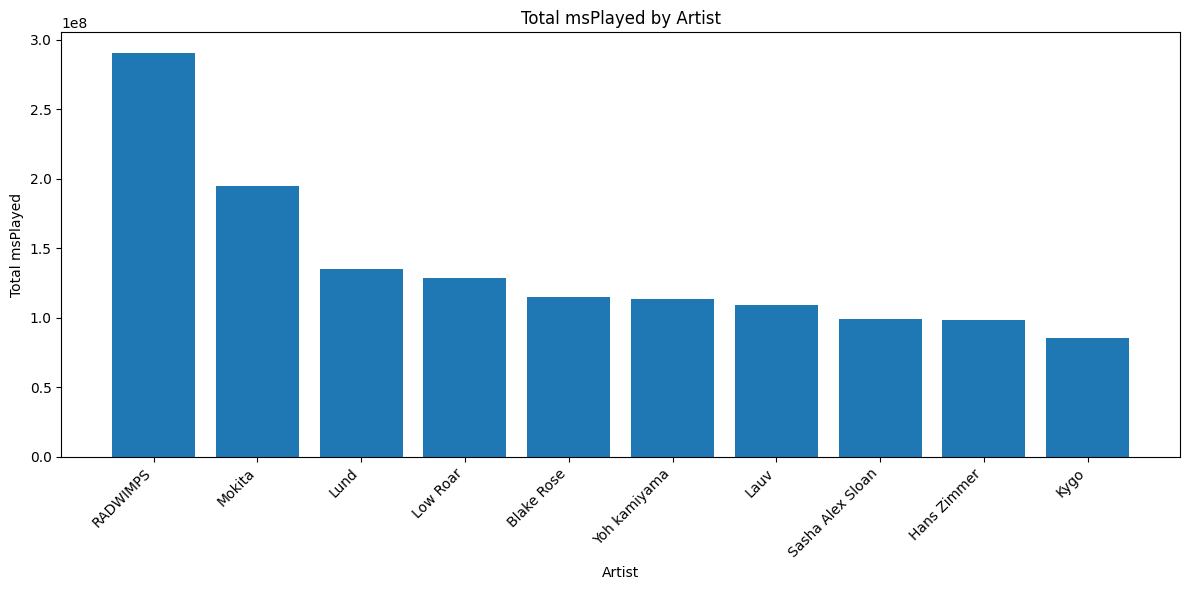

In [8]:
popular_artist = pd.DataFrame({'artist' : sorted_popular_artist['artistName'] , 'Total' : sorted_popular_artist['Total_msPlayed']})
plt.figure(figsize=(12, 6))
plt.bar(popular_artist['artist'], popular_artist['Total'])
plt.title('Total msPlayed by Artist')
plt.xlabel('Artist')
plt.ylabel('Total msPlayed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
RADWIMPS = spotify.loc [(spotify['artistName']=='RADWIMPS')]
RADWIMPS_analysis = RADWIMPS.sort_values(by= 'msPlayed' ,ascending= False )
RADWIMPS_analysis [['trackName' , 'msPlayed']]
RADWIMPS_df = pd.DataFrame({'trackName': RADWIMPS_analysis['trackName'] , 'msPlayed' : RADWIMPS_analysis['msPlayed']})
RADWIMPS_df = RADWIMPS_df.head(10)
RADWIMPS_df

,trackName,msPlayed
4194,Sparkle - movie ver.,158367130
958,バイ・マイ・サイ,35067707
3272,Nandemonaiya - movie edit.,24859875
2089,Grand Escape (feat. Toko Miura),13335642
512,Zenzenzense - movie ver.,11163228
1641,Dream lantern,6669750
4312,Suzume,5507411
3273,Nandemonaiya - movie ver.,4931544
4537,Theme of Mitsuha,2629358
1476,Date,2493661


Analysis Top artist

C:\Users\Mamzi\AppData\Local\Temp\ipykernel_13028\463279335.py:7: UserWarning: Glyph 12496 (\N{KATAKANA LETTER BA}) missing from current font.
  plt.tight_layout()
C:\Users\Mamzi\AppData\Local\Temp\ipykernel_13028\463279335.py:7: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  plt.tight_layout()
C:\Users\Mamzi\AppData\Local\Temp\ipykernel_13028\463279335.py:7: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  plt.tight_layout()
C:\Users\Mamzi\AppData\Local\Temp\ipykernel_13028\463279335.py:7: UserWarning: Glyph 12510 (\N{KATAKANA LETTER MA}) missing from current font.
  plt.tight_layout()
C:\Users\Mamzi\AppData\Local\Temp\ipykernel_13028\463279335.py:7: UserWarning: Glyph 12469 (\N{KATAKANA LETTER SA}) missing from current font.
  plt.tight_layout()
C:\Users\Mamzi\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12496 (\N{KATAKANA LETTER BA}) missing from current font.
  fig.can

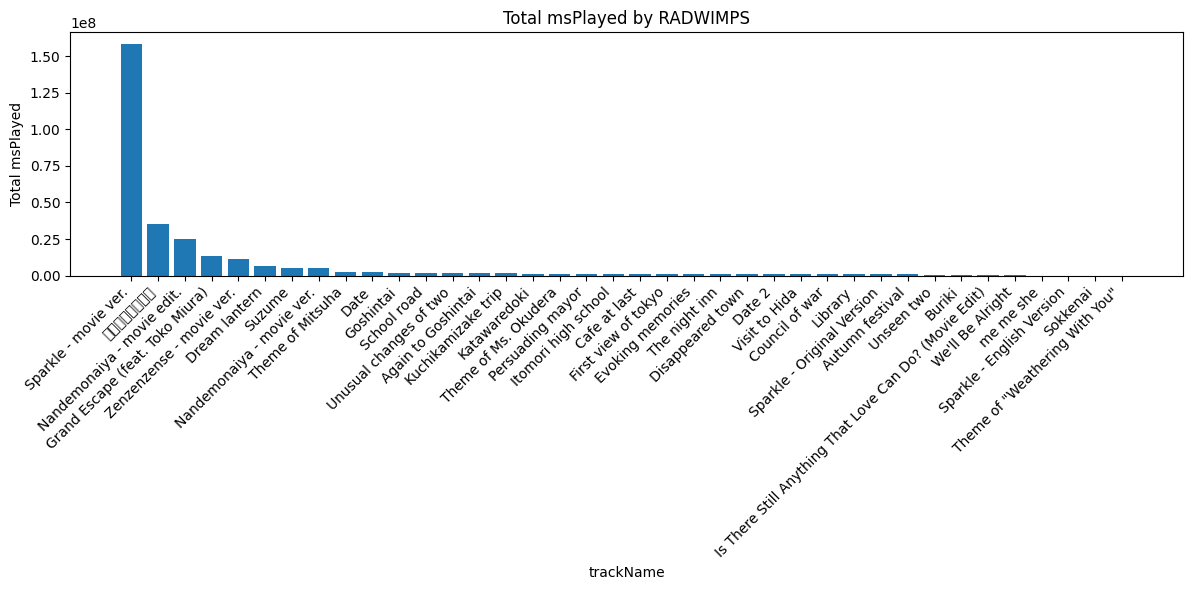

In [10]:
plt.figure(figsize=(12, 6))
plt.bar(RADWIMPS_analysis['trackName'], RADWIMPS_analysis['msPlayed'])
plt.title('Total msPlayed by RADWIMPS')
plt.xlabel('trackName')
plt.ylabel('Total msPlayed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

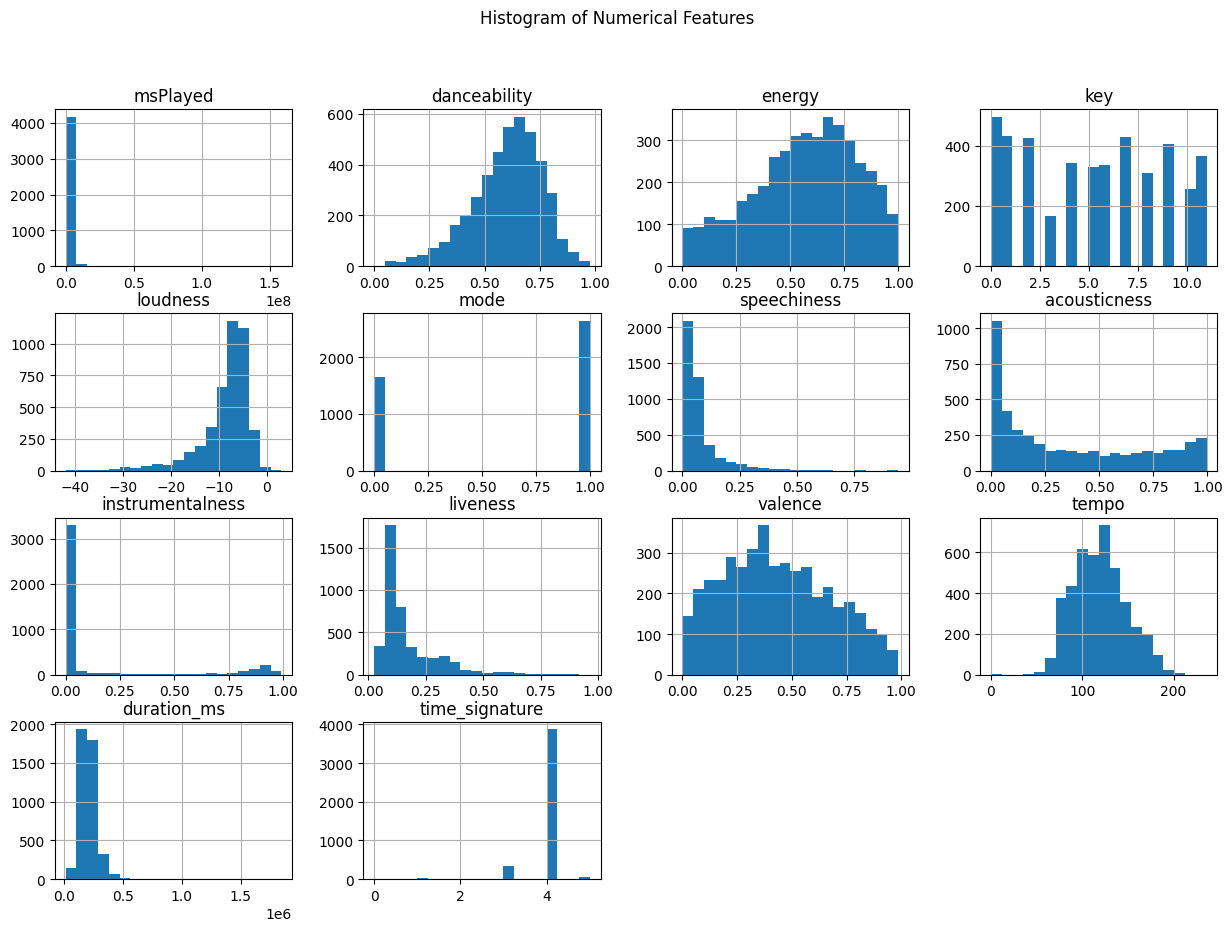

In [11]:
clean = spotify.dropna()
numerical_columns = clean.select_dtypes(include=[np.number]).columns
clean[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histogram of Numerical Features")
plt.show()



Popular Track

In [12]:
popular_music = spotify.groupby(['trackName', 'artistName'])['msPlayed'].sum()
popular_music = pd.DataFrame({'trackName' : popular_music.index , 'msPlayed' : popular_music.values})
popular_music = popular_music.sort_values(by='msPlayed' , ascending= False)
popular_music.head(10)

,trackName,msPlayed
3690,"(Sparkle - movie ver., RADWIMPS)",158367130
5033,"(色香水, Yoh kamiyama)",109652914
1554,"(Gone, Blake Rose)",105798353
2386,"(Lonely City, Mokita)",102503285
4055,"(This Town (feat. Sasha Alex Sloan), Kygo)",76360841
4298,"(Wannabe - Sped Up Version, why mona)",73878220
4205,"(Until I Found You, Stephen Sanchez)",64160505
1267,"(Eye-Water, Hiroyuki Sawano)",58340251
4442,"(Without Me, Eminem)",56975970
359,"(BYE, Jaden)",54688953


In [13]:
df_genre = clean.groupby('genre')[['energy', 'loudness', 'speechiness', 'duration_ms', 'tempo', 'liveness']].mean()
df_genre


,energy,loudness,speechiness,duration_ms,tempo,liveness
genre,,,,,,
a cappella,0.0281,-37.841,0.0635,269636.0,60.2980,0.2880
abstract,0.8880,-11.914,0.0656,465200.0,144.0380,0.1110
abstract beats,0.6360,-8.688,0.0755,73898.0,78.2440,0.2300
abstract hip hop,0.8960,-6.456,0.0452,283747.0,100.0170,0.7050
acoustic opm,0.3630,-8.127,0.0291,244800.0,99.9050,0.0928
...,...,...,...,...,...,...
virginia indie,0.6500,-8.205,0.0455,174854.0,127.9160,0.3570
vocal trance,0.5890,-5.262,0.0351,179833.0,134.9970,0.0531
wave,0.6430,-7.630,0.0323,175385.0,125.9830,0.0681


Total msPlayed


In [14]:
total = clean['msPlayed'].sum()
total

6589093690